In [106]:
!pip install -Uqq fastbook kaggle waterfallcharts treeinterpreter dtreeviz
import fastbook
fastbook.setup_book()

In [1]:
#hide
from fastbook import *
from pandas.api.types import is_string_dtype, is_numeric_dtype, is_categorical_dtype
from fastai.tabular.all import *
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from dtreeviz.trees import *
from IPython.display import Image, display_svg, SVG

pd.options.display.max_rows = 20
pd.options.display.max_columns = 8

In [123]:
data = pd.read_csv('data/GALLUP.csv')
data

,WP16,wgt,country,income_2,WP1219,WP1220,year,weo_gdpc_con_ppp
0,4,1.800488,Israel,18042.771080,1.0,15.0,2016,32658.020
1,4,2.360024,Israel,12799.412740,1.0,15.0,2013,31369.909
2,8,1.463117,Israel,22448.936000,1.0,15.0,2015,32038.697
3,5,1.246618,Israel,16853.739740,1.0,15.0,2014,31844.204
4,8,1.800488,Israel,22206.487490,1.0,15.0,2016,32658.020
...,...,...,...,...,...,...,...,...
1340804,3,0.569955,Zimbabwe,566.020845,1.0,100.0,2017,2079.190
1340805,3,0.533722,Zimbabwe,453.127896,1.0,100.0,2014,2134.776
1340806,5,1.286156,Zimbabwe,0.000000,1.0,100.0,2011,1920.745
1340807,5,0.643078,Zimbabwe,2869.777740,1.0,100.0,2011,1920.745


In [124]:
data.isna().sum()

WP16                    0
wgt                     0
country                 0
income_2                0
WP1219                  1
WP1220                185
year                    0
weo_gdpc_con_ppp    24122
dtype: int64

In [125]:
data = data.interpolate(method='linear', axis=0)

In [126]:
data.isna().sum()

WP16                0
wgt                 0
country             0
income_2            0
WP1219              0
WP1220              0
year                0
weo_gdpc_con_ppp    0
dtype: int64

In [127]:
data.columns

Index(['WP16', 'wgt', 'country', 'income_2', 'WP1219', 'WP1220', 'year',
       'weo_gdpc_con_ppp'],
      dtype='object')

In [7]:
data['WP16'].unique()

array([ 4,  8,  5, 10,  9,  1,  7,  3,  0,  6,  2])

In [8]:
data['WP16'].astype('category')

0          4
1          4
2          8
3          5
4          8
          ..
1340804    3
1340805    3
1340806    5
1340807    5
1340808    7
Name: WP16, Length: 1340809, dtype: category
Categories (11, int64): [0, 1, 2, 3, ..., 7, 8, 9, 10]

In [9]:
dep_var = 'WP16'

In [10]:
np.log(data[dep_var])

/Users/amrmkayid/anaconda3/envs/nam/lib/python3.7/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0          1.386294
1          1.386294
2          2.079442
3          1.609438
4          2.079442
             ...   
1340804    1.098612
1340805    1.098612
1340806    1.609438
1340807    1.609438
1340808    1.945910
Name: WP16, Length: 1340809, dtype: float64

In [12]:
data[dep_var] = np.log(data[dep_var])

---
---
---

In [11]:
data['year'].unique()

array([2016, 2013, 2015, 2014, 2017, 2012, 2011, 2009, 2010])

<AxesSubplot:>

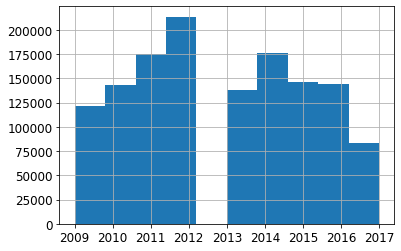

In [12]:
data['year'].hist()

In [13]:
procs = [Categorify, FillMissing]

In [14]:
msk = np.random.rand(len(data)) < 0.8
train_idx = np.where( msk)[0]
valid_idx = np.where(~msk)[0]

splits = (list(train_idx),list(valid_idx))

In [15]:
cont,cat = cont_cat_split(data, 1, dep_var=dep_var)
cont,cat

(['wgt', 'income_2', 'WP1219', 'WP1220', 'year', 'weo_gdpc_con_ppp'],
 ['country'])

In [16]:
to = TabularPandas(data, procs, cat, cont, y_names=dep_var, splits=splits)

In [17]:
len(to.train),len(to.valid)

(1072714, 268095)

In [18]:
to.show(3)

,country,wgt,income_2,WP1219,WP1220,year,weo_gdpc_con_ppp,WP16
0,Israel,1.800488,18042.771484,1.0,15.0,2016,32658.019531,4
2,Israel,1.463117,22448.935547,1.0,15.0,2015,32038.697266,8
3,Israel,1.246618,16853.740234,1.0,15.0,2014,31844.203125,5


In [19]:
to.items.head(3)

,WP16,wgt,country,income_2,WP1219,WP1220,year,weo_gdpc_con_ppp
0,4,1.800488,66,18042.771484,1.0,15.0,2016,32658.019531
2,8,1.463117,66,22448.935547,1.0,15.0,2015,32038.697266
3,5,1.246618,66,16853.740234,1.0,15.0,2014,31844.203125


In [20]:
to.classes['country']

['#na#', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Estonia', 'Ethiopia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Guinea', 'Haiti', 'Honduras', 'Hong Kong SAR, China', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, Islamic Rep.', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Korea, Rep.', 'Kuwait', 'Kyrgyz Republic', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya'

In [21]:
path = Path('.')
Path.BASE_PATH = path

In [22]:
save_pickle(path/'to.pkl',to)

---
---

## Creating the Decision Tree


In [29]:
path/'to.pkl'

Path('to.pkl')

In [25]:
to = load_pickle(path/'to.pkl')

In [23]:
xs,y = to.train.xs,to.train.y
valid_xs,valid_y = to.valid.xs,to.valid.y

In [24]:
m = DecisionTreeRegressor(max_leaf_nodes=4)
m.fit(xs, y);

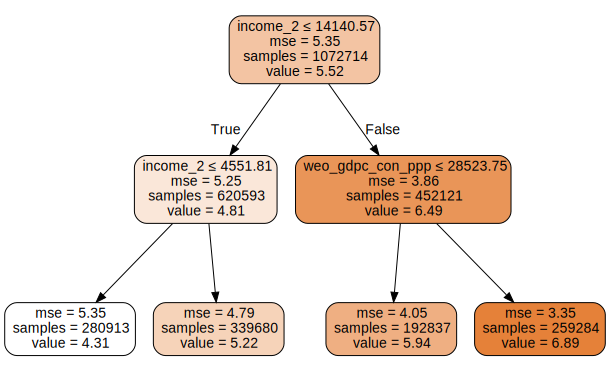

In [25]:
draw_tree(m, xs, size=10, leaves_parallel=True, precision=2)

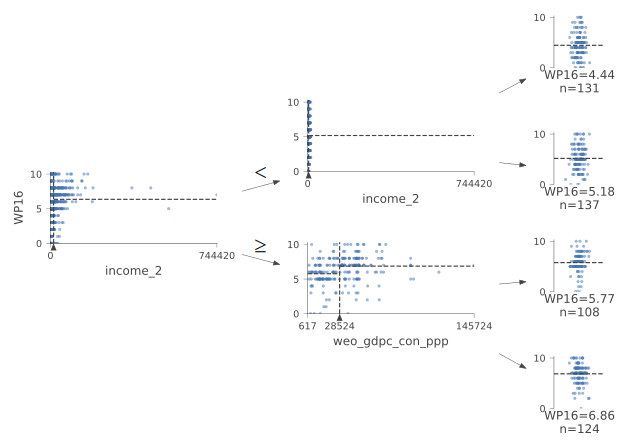

In [26]:
samp_idx = np.random.permutation(len(y))[:500]
dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

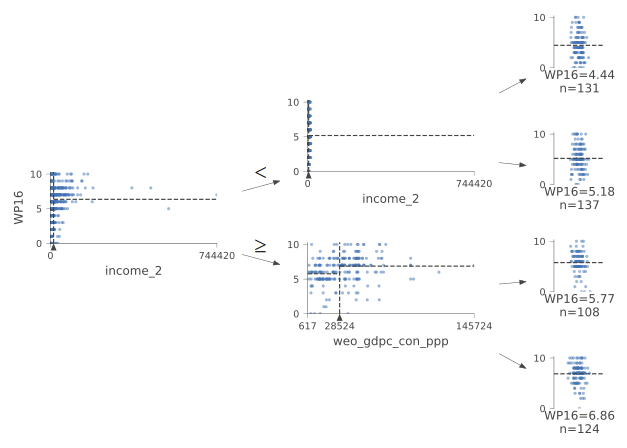

In [27]:
m = DecisionTreeRegressor(max_leaf_nodes=4).fit(xs, y)

dtreeviz(m, xs.iloc[samp_idx], y.iloc[samp_idx], xs.columns, dep_var,
        fontname='DejaVu Sans', scale=1.6, label_fontsize=10,
        orientation='LR')

In [28]:
m = DecisionTreeRegressor()
m.fit(xs, y);

In [29]:
def r_mse(pred,y): return round(math.sqrt(((pred-y)**2).mean()), 6)
def m_rmse(m, xs, y): return r_mse(m.predict(xs), y)

In [30]:
m_rmse(m, xs, y)

0.315776

In [31]:
m_rmse(m, valid_xs, valid_y)

2.7808

In [32]:
m.get_n_leaves(), len(xs)

(779516, 1072714)

In [33]:
m = DecisionTreeRegressor(min_samples_leaf=25)
m.fit(to.train.xs, to.train.y)
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(1.833419, 2.030816)

In [34]:
m.get_n_leaves()

32679

---
---

## Random Forests

In [35]:
def rf(xs, y, n_estimators=40, max_samples=200_000,
       max_features=0.5, min_samples_leaf=5, **kwargs):
    return RandomForestRegressor(n_jobs=-1, n_estimators=n_estimators,
        max_samples=max_samples, max_features=max_features,
        min_samples_leaf=min_samples_leaf, oob_score=True).fit(xs, y)

In [36]:
m = rf(xs, y);

In [37]:
m_rmse(m, xs, y), m_rmse(m, valid_xs, valid_y)

(1.836341, 1.954328)

In [38]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [39]:
r_mse(preds.mean(0), valid_y)

1.954328

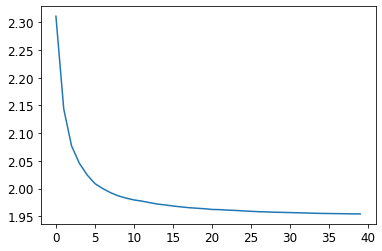

In [40]:
plt.plot([r_mse(preds[:i+1].mean(0), valid_y) for i in range(40)]);

### Out-of-Bag Error

In [41]:
r_mse(m.oob_prediction_, y)

1.959727

### Model Interpretation

In [42]:
preds = np.stack([t.predict(valid_xs) for t in m.estimators_])

In [43]:
preds.shape

(40, 268095)

In [44]:
preds_std = preds.std(0)

In [45]:
preds_std[:5]

array([1.55546863, 0.75009273, 0.94756123, 1.00055055, 1.50899089])

### Feature Importance

In [46]:
def rf_feat_importance(m, df):
    return pd.DataFrame({'cols':df.columns, 'imp':m.feature_importances_}
                       ).sort_values('imp', ascending=False)

In [47]:
fi = rf_feat_importance(m, xs)
fi[:10]

,cols,imp
2,income_2,0.345408
6,weo_gdpc_con_ppp,0.234554
1,wgt,0.135982
4,WP1220,0.112416
0,country,0.104316
5,year,0.050734
3,WP1219,0.016589


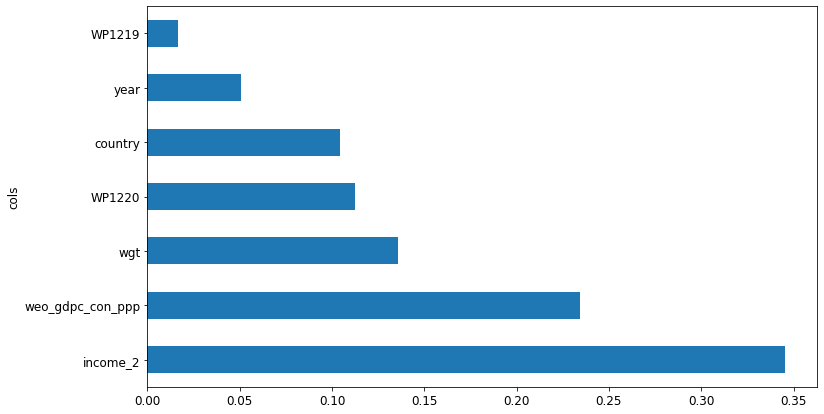

In [48]:
def plot_fi(fi):
    return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

plot_fi(fi[:30]);

### Removing Low-Importance Variables

In [49]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

7

In [50]:
xs_imp = xs[to_keep]
valid_xs_imp = valid_xs[to_keep]

In [52]:
m = rf(xs_imp, y)

In [53]:
m_rmse(m, xs_imp, y), m_rmse(m, valid_xs_imp, valid_y)

(1.835853, 1.953854)

In [54]:
len(xs.columns), len(xs_imp.columns)

(7, 7)

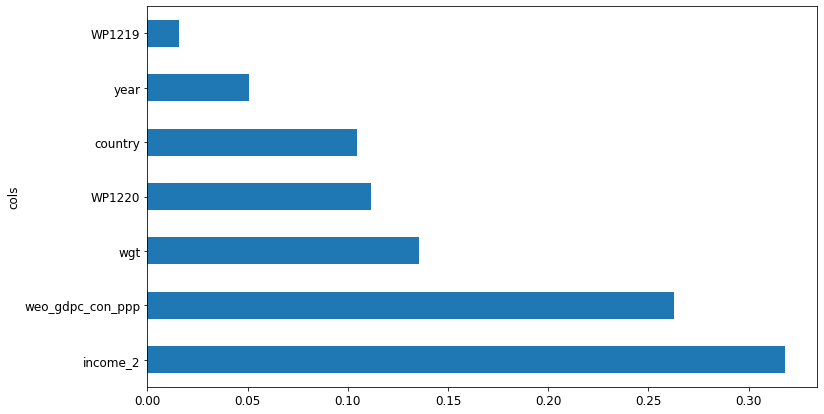

In [55]:
plot_fi(rf_feat_importance(m, xs_imp));

### Removing Redundant Features

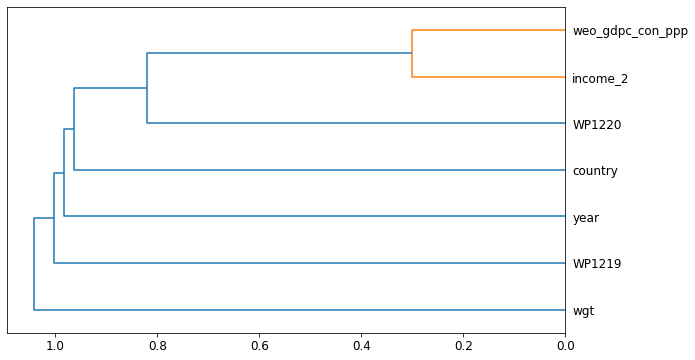

In [56]:
cluster_columns(xs_imp)

In [57]:
def get_oob(df):
    m = RandomForestRegressor(n_estimators=40, min_samples_leaf=15,
        max_samples=50000, max_features=0.5, n_jobs=-1, oob_score=True)
    m.fit(df, y)
    return m.oob_score_

In [58]:
get_oob(xs_imp)

0.2667967713788614

In [61]:
columns = list(xs_imp.columns)
columns

['income_2', 'weo_gdpc_con_ppp', 'wgt', 'WP1220', 'country', 'year', 'WP1219']

In [62]:
{c:get_oob(xs_imp.drop(c, axis=1)) for c in columns}

{'income_2': 0.23822219159796543,
 'weo_gdpc_con_ppp': 0.23420088794282612,
 'wgt': 0.27067211831505344,
 'WP1220': 0.2680537842566282,
 'country': 0.2352270957244954,
 'year': 0.26698757763721703,
 'WP1219': 0.27012403124735795}

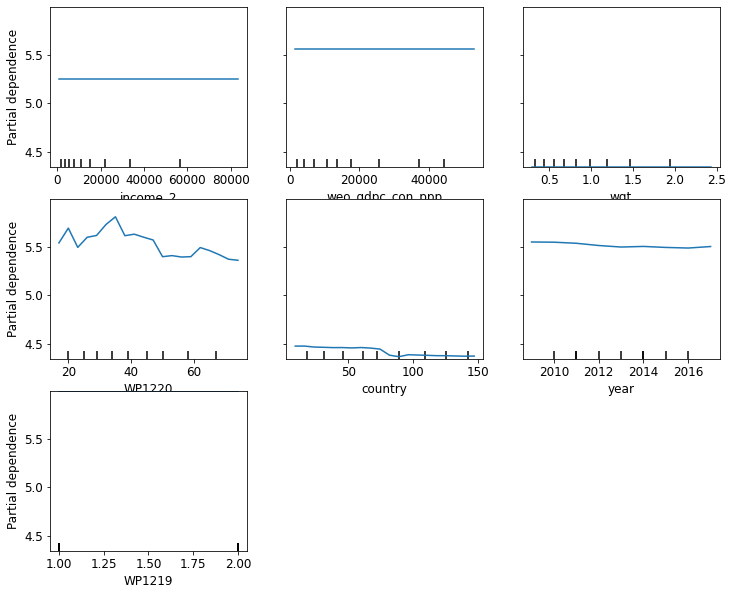

In [64]:
from sklearn.inspection import plot_partial_dependence

fig,ax = plt.subplots(figsize=(12, 10))
plot_partial_dependence(m, valid_xs, columns,
                        grid_resolution=20, ax=ax);

### Data Leakage

In [65]:
import warnings
warnings.simplefilter('ignore', FutureWarning)

from treeinterpreter import treeinterpreter
from waterfall_chart import plot as waterfall

In [66]:
row = valid_xs.iloc[:5]

In [67]:
prediction,bias,contributions = treeinterpreter.predict(m, row.values)

In [68]:
prediction[0], bias[0], contributions[0].sum()

(array([3.24982233]), 5.515134375, -2.265312044552669)

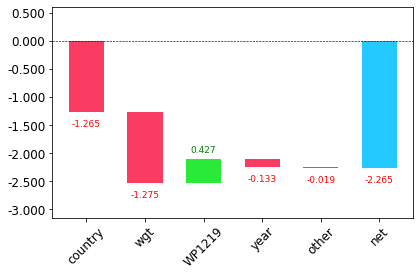

In [69]:
waterfall(valid_xs.columns, contributions[0], threshold=0.08, 
          rotation_value=45,formatting='{:,.3f}');

## Extrapolation and Neural Networks

In [70]:
np.random.seed(42)

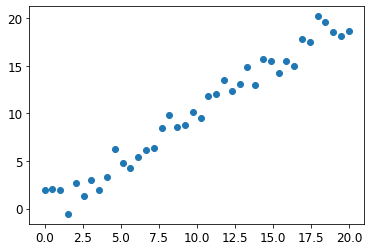

In [71]:
x_lin = torch.linspace(0,20, steps=40)
y_lin = x_lin + torch.randn_like(x_lin)
plt.scatter(x_lin, y_lin);

In [72]:
xs_lin = x_lin.unsqueeze(1)
x_lin.shape,xs_lin.shape

(torch.Size([40]), torch.Size([40, 1]))

In [73]:
x_lin[:,None].shape

torch.Size([40, 1])

In [74]:
m_lin = RandomForestRegressor().fit(xs_lin[:30],y_lin[:30])

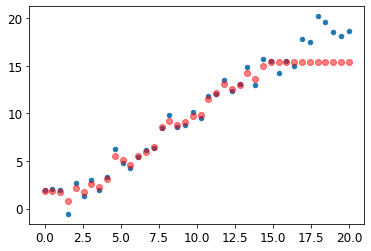

In [75]:
plt.scatter(x_lin, y_lin, 20)
plt.scatter(x_lin, m_lin.predict(xs_lin), color='red', alpha=0.5);

### Finding Out-of-Domain Data

In [77]:
df_dom = pd.concat([xs, valid_xs])
is_valid = np.array([0]*len(xs) + [1]*len(valid_xs))

m = rf(df_dom, is_valid)
rf_feat_importance(m, df_dom)[:6]

,cols,imp
1,wgt,0.255943
2,income_2,0.248635
4,WP1220,0.171302
6,weo_gdpc_con_ppp,0.144343
0,country,0.090157
5,year,0.063300


In [78]:
m = rf(xs, y)
print('orig', m_rmse(m, valid_xs, valid_y))

for c in columns:
    m = rf(xs.drop(c,axis=1), y)
    print(c, m_rmse(m, valid_xs.drop(c,axis=1), valid_y))

orig 1.952948
income_2 2.007686
weo_gdpc_con_ppp 1.990856
wgt 1.954459
WP1220 1.963125
country 1.993099
year 1.955895
WP1219 1.952724


### Using a Neural Network

In [128]:
data = data.drop('country', axis=1)
data = data.drop('year', axis=1)

In [129]:
data

,WP16,wgt,income_2,WP1219,WP1220,weo_gdpc_con_ppp
0,4,1.800488,18042.771080,1.0,15.0,32658.020
1,4,2.360024,12799.412740,1.0,15.0,31369.909
2,8,1.463117,22448.936000,1.0,15.0,32038.697
3,5,1.246618,16853.739740,1.0,15.0,31844.204
4,8,1.800488,22206.487490,1.0,15.0,32658.020
...,...,...,...,...,...,...
1340804,3,0.569955,566.020845,1.0,100.0,2079.190
1340805,3,0.533722,453.127896,1.0,100.0,2134.776
1340806,5,1.286156,0.000000,1.0,100.0,1920.745
1340807,5,0.643078,2869.777740,1.0,100.0,1920.745


In [130]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340809 entries, 0 to 1340808
Data columns (total 6 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   WP16              1340809 non-null  int64  
 1   wgt               1340809 non-null  float64
 2   income_2          1340809 non-null  float64
 3   WP1219            1340809 non-null  float64
 4   WP1220            1340809 non-null  float64
 5   weo_gdpc_con_ppp  1340809 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 61.4 MB


In [131]:
data = data.astype({'WP16': np.float64})

In [132]:
cont_nn,cat_nn = cont_cat_split(data, max_card=9000, dep_var=dep_var)

In [133]:
procs_nn = [Categorify, FillMissing, Normalize]
to_nn = TabularPandas(data, procs_nn, cat_nn, cont_nn,
                      splits=splits, y_names=dep_var)

In [134]:
to_nn.items

,WP16,wgt,income_2,WP1219,WP1220,weo_gdpc_con_ppp
0,4.0,1.184375,-0.009061,-1.065468,-1.488701,0.652314
2,8.0,0.686407,-0.004140,-1.065468,-1.488701,0.620090
3,5.0,0.366850,-0.010390,-1.065468,-1.488701,0.609970
4,8.0,1.184375,-0.004410,-1.065468,-1.488701,0.652314
5,10.0,0.686407,-0.002572,-1.065468,-1.488701,0.620090
...,...,...,...,...,...,...
1340780,7.0,-0.775087,-0.029124,0.938555,3.279381,-0.859475
1340783,7.0,-0.747247,-0.024580,-1.065468,3.279381,-0.859105
1340793,3.0,-1.004632,-0.028231,-1.065468,3.279381,-0.971091
1340797,5.0,-0.088966,-0.027698,-1.065468,3.279381,-0.935825


In [135]:
dls = to_nn.dataloaders(1024)

In [136]:
y = to_nn.train.y
y.min(),y.max()

(0.0, 10.0)

In [137]:
learn = tabular_learner(dls, y_range=(0,10), layers=[500,250],
                        n_out=1, loss_func=F.mse_loss)

In [138]:
learn.__dict__

{'dls': <fastai.tabular.data.TabularDataLoaders at 0x7feca8c8f1d0>,
 'model': TabularModel(
   (embeds): ModuleList()
   (emb_drop): Dropout(p=0.0, inplace=False)
   (bn_cont): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
   (layers): Sequential(
     (0): LinBnDrop(
       (0): BatchNorm1d(5, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (1): Linear(in_features=5, out_features=500, bias=False)
       (2): ReLU(inplace=True)
     )
     (1): LinBnDrop(
       (0): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
       (1): Linear(in_features=500, out_features=250, bias=False)
       (2): ReLU(inplace=True)
     )
     (2): LinBnDrop(
       (0): Linear(in_features=250, out_features=1, bias=True)
     )
     (3): SigmoidRange(low=0, high=10)
   )
 ),
 '__stored_args__': {'loss_func': <function torch.nn.functional.mse_loss(input, target, size_average=None, reduce=None, reduction='mean')>,
  'opt_f

In [139]:
dls.show_batch()

,wgt,income_2,WP1219,WP1220,weo_gdpc_con_ppp,WP16
0,0.661746,3483.691251,2.0,18.999999,3835.466745,5.0
1,0.952663,2775.959374,2.0,18.999999,2406.104565,5.0
2,0.436055,8685.580157,2.0,46.000000,25837.286979,3.0
3,2.133200,1493.921426,1.0,55.000000,8578.351073,4.0
4,0.437061,28239.836022,2.0,49.000000,13026.656160,7.0
5,1.955194,36131.832033,1.0,40.000000,25031.036887,6.0
6,0.278596,20331.021509,2.0,35.000000,21519.099676,5.0
7,1.081073,5150.807642,1.0,23.000000,7230.448222,5.0
8,0.626213,5558.770418,1.0,21.000001,14980.226330,6.0
9,0.348542,4642.078093,2.0,49.000000,19090.472637,8.0


SuggestedLRs(lr_min=0.0033113110810518267, lr_steep=2.2908675418875646e-06)

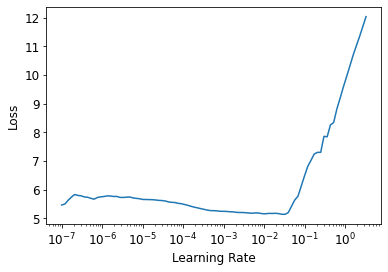

In [140]:
learn.lr_find()

In [141]:
learn.fit_one_cycle(5, 1e-2)

epoch,train_loss,valid_loss,time
0,4.304468,4.724837,00:25
1,4.267912,4.448319,00:23
2,4.230354,4.463119,00:23
3,4.240880,4.425483,00:24
4,4.248331,4.287162,00:27


In [142]:
preds,targs = learn.get_preds()
r_mse(preds,targs)

2.070546

In [145]:
valid_xs = valid_xs.drop('country', axis=1)

In [146]:
rf_preds = m.predict(valid_xs)
ens_preds = (to_np(preds.squeeze()) + rf_preds) /2

In [147]:
r_mse(ens_preds,valid_y)


2.101774

---
---
---

In [1]:
import tim

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from tqdm.notebook import tqdm


from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, WeightedRandomSampler

In [2]:
from nam.config import defaults
from nam.data import NAMDataset
from nam.models import NAM, get_num_units

## Config

In [3]:
config = defaults()
config

namespace(device='cpu',
          output_dir='output',
          training_epochs=10,
          lr=0.01,
          batch_size=1024,
          hidden_sizes=[64, 32],
          activation='exu',
          optimizer='adam',
          dropout=0.5,
          feature_dropout=0.0,
          decay_rate=0.995,
          l2_regularization=0.0,
          output_regularization=0.0,
          num_basis_functions=1000,
          units_multiplier=2,
          num_units=64,
          data_split=1,
          seed=1377,
          cross_val=False,
          n_models=1,
          num_splits=3,
          fold_num=1,
          shuffle=True,
          regression=False,
          debug=False,
          use_dnn=False,
          patience=10,
          n_folds=5,
          num_workers=16)

## DATA

In [4]:
data = pd.read_csv('data/GALLUP.csv')
data

,WP16,wgt,country,income_2,WP1219,WP1220,year,weo_gdpc_con_ppp
0,4,1.800488,Israel,18042.771080,1.0,15.0,2016,32658.020
1,4,2.360024,Israel,12799.412740,1.0,15.0,2013,31369.909
2,8,1.463117,Israel,22448.936000,1.0,15.0,2015,32038.697
3,5,1.246618,Israel,16853.739740,1.0,15.0,2014,31844.204
4,8,1.800488,Israel,22206.487490,1.0,15.0,2016,32658.020
...,...,...,...,...,...,...,...,...
1340804,3,0.569955,Zimbabwe,566.020845,1.0,100.0,2017,2079.190
1340805,3,0.533722,Zimbabwe,453.127896,1.0,100.0,2014,2134.776
1340806,5,1.286156,Zimbabwe,0.000000,1.0,100.0,2011,1920.745
1340807,5,0.643078,Zimbabwe,2869.777740,1.0,100.0,2011,1920.745


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340809 entries, 0 to 1340808
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   WP16              1340809 non-null  int64  
 1   wgt               1340809 non-null  float64
 2   country           1340809 non-null  object 
 3   income_2          1340809 non-null  float64
 4   WP1219            1340808 non-null  float64
 5   WP1220            1340624 non-null  float64
 6   year              1340809 non-null  int64  
 7   weo_gdpc_con_ppp  1316687 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 81.8+ MB


In [6]:
data.describe()

,WP16,wgt,income_2,WP1219,WP1220,year,weo_gdpc_con_ppp
count,1.340809e+06,1.340809e+06,1.340809e+06,1.340808e+06,1.340624e+06,1.340809e+06,1.316687e+06
mean,5.515844e+00,9.981441e-01,2.661370e+04,1.531649e+00,4.152368e+01,2.012821e+03,2.023897e+04
std,2.312987e+00,6.772548e-01,1.116962e+06,4.989975e-01,1.781361e+01,2.363612e+00,1.934277e+04
min,0.000000e+00,6.493207e-02,0.000000e+00,1.000000e+00,1.300000e+01,2.009000e+03,6.043400e+02
25%,4.000000e+00,4.892472e-01,4.311222e+03,1.000000e+00,2.700000e+01,2.011000e+03,5.190297e+03
50%,5.000000e+00,8.148008e-01,1.084338e+04,2.000000e+00,3.900000e+01,2.013000e+03,1.384583e+04
75%,7.000000e+00,1.307699e+00,2.694815e+04,2.000000e+00,5.400000e+01,2.015000e+03,3.174637e+04
max,1.000000e+01,7.637515e+00,8.980336e+08,2.000000e+00,1.010000e+02,2.017000e+03,1.457238e+05


In [7]:
data.WP16.value_counts()

5     304903
7     181094
6     170730
8     164172
4     144256
3     117753
2      64560
10     62924
9      60022
1      36923
0      33472
Name: WP16, dtype: int64

<AxesSubplot:xlabel='WP16', ylabel='count'>

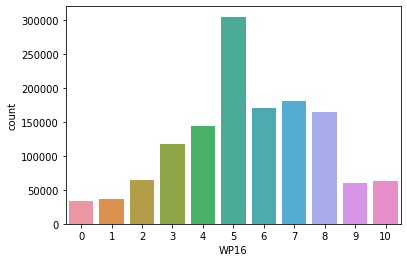

In [8]:
sns.countplot(x = 'WP16', data=data)

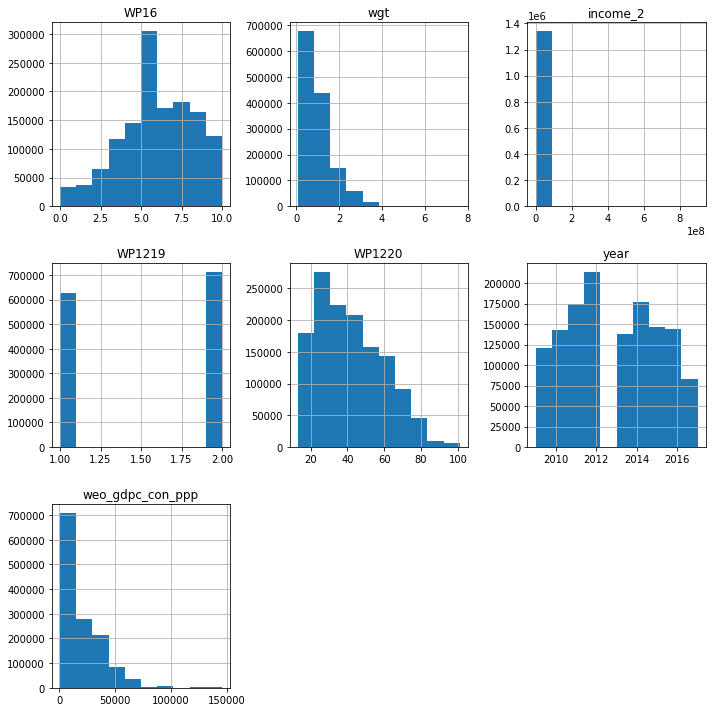

In [21]:
data.hist(figsize=(10,10))
plt.tight_layout()

### Correlations

<AxesSubplot:>

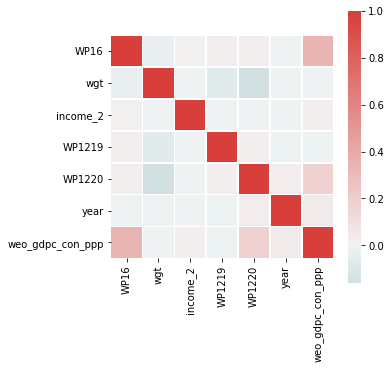

In [23]:
corr = data.corr()
f, ax = plt.subplots(figsize=(5, 5))
cmap = sns.diverging_palette(2000, 13, as_cmap=True)
sns.heatmap(corr, cmap=cmap, center=0,square=True, linewidths=.5)

### PaiPlots

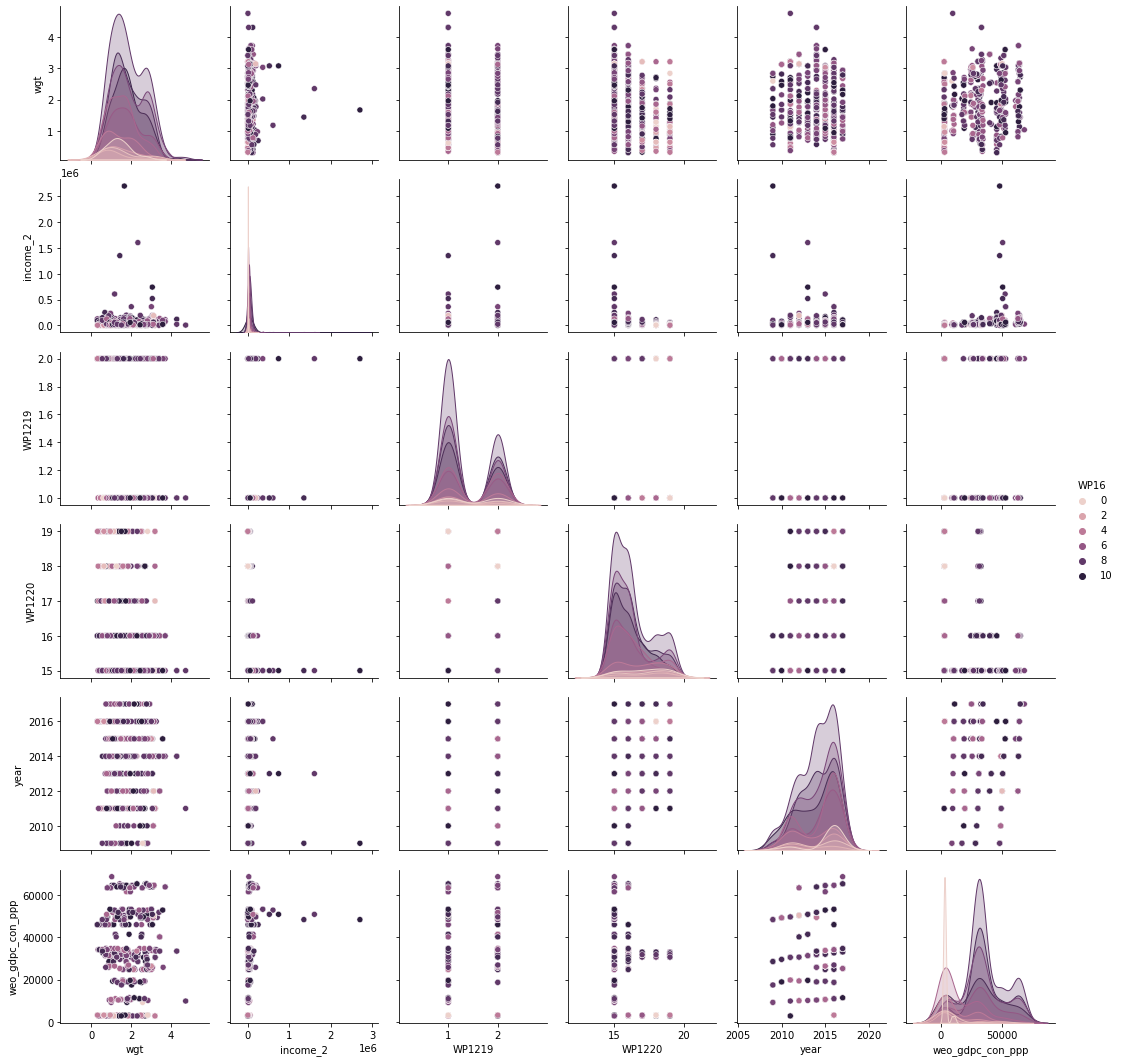

In [37]:
sns.pairplot(data[:1000], hue = 'WP16')

### Outliers

<AxesSubplot:>

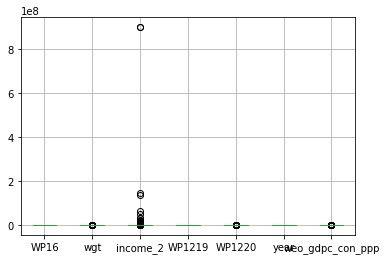

In [29]:
data.boxplot()

<AxesSubplot:>

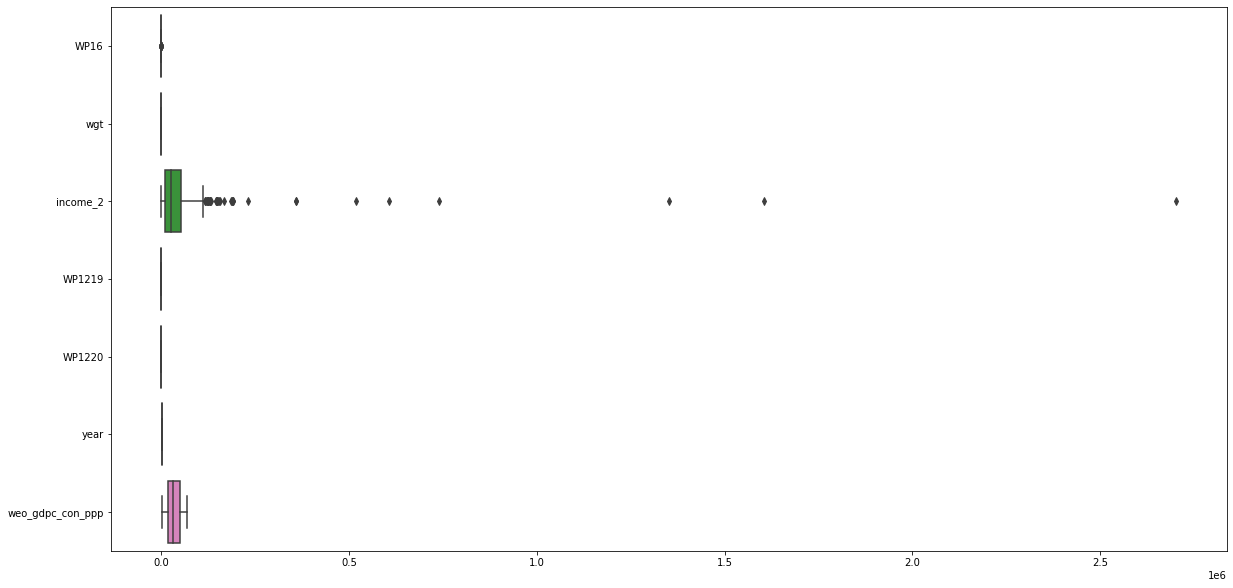

In [41]:
fig = plt.figure(figsize = (20,10))
ax = fig.gca()
sns.boxplot(data= data[500:1000], orient="h",  ax = ax)

## Remove NaNs

In [9]:
data = data.interpolate(method='linear', axis=0)

---
---
---

In [40]:
dataset = NAMDataset(
    config=config,
    csv_file=data, #'data/GALLUP.csv',
    features_columns = ["income_2", "WP1219", "WP1220", "weo_gdpc_con_ppp"],
    targets_column = ["WP16"],
    weights_column = ["wgt"],   
#     one_hot=True,
)
dataset

NAMDatasetSample(
	features=tensor([3.0974e+04, 2.0000e+00, 3.8000e+01, 1.6759e+04]), 
	targets=tensor([1.]), 
	weights=tensor([0.4565])
)

In [41]:
weighted_sampler = WeightedRandomSampler(
    weights=dataset.weights,
    num_samples=len(dataset),
    replacement=True
)

In [42]:
train_dataset, test_dataset = torch.utils.data.random_split(
  dataset,
  [int(np.floor(len(dataset) * .9)),
   int(np.ceil(len(dataset) * .1))],
)
print(f"train_dataset: {len(train_dataset)}, test_dataset: {len(test_dataset)}")

train_dataset, val_dataset = torch.utils.data.random_split(
  train_dataset,
  [int(np.floor(len(train_dataset) * .8)),
   int(np.ceil(len(train_dataset) * .2))],
)
print(f"train_dataset: {len(train_dataset)}, val_dataset: {len(val_dataset)}")

train_dataloader = DataLoader(
  train_dataset,
  batch_size=config.batch_size,
  shuffle=True,
  num_workers=config.num_workers,
#   sampler=weighted_sampler,
)
val_dataloader = DataLoader(
  val_dataset,
  batch_size=config.batch_size * 5,
  shuffle=False,
  num_workers=config.num_workers,
)

train_dataset: 1206728, test_dataset: 134081
train_dataset: 965382, val_dataset: 241346


In [43]:
next(iter(train_dataloader))

[tensor([[1.7930e+03, 2.0000e+00, 4.0000e+01, 5.2336e+03],
         [7.8890e+03, 2.0000e+00, 1.7000e+01, 2.6061e+03],
         [1.2793e+04, 2.0000e+00, 2.5000e+01, 1.0572e+03],
         ...,
         [7.4095e+03, 2.0000e+00, 2.5000e+01, 1.8411e+03],
         [9.4302e+03, 1.0000e+00, 3.0000e+01, 1.8411e+03],
         [1.4289e+04, 1.0000e+00, 4.2000e+01, 4.2492e+03]]),
 tensor([[ 7.],
         [ 0.],
         [10.],
         ...,
         [ 3.],
         [ 5.],
         [ 5.]]),
 tensor([[2.5051],
         [0.5674],
         [0.9002],
         ...,
         [2.6331],
         [0.4706],
         [0.8630]])]

In [44]:
features, targets, *weights = next(iter(train_dataloader))

---
---
---

In [52]:
model = NAM(
      config=config,
      name="NAMModel_GALLUP",
      num_inputs=len(dataset[0][0]),
      num_units=get_num_units(config, train_dataloader)
)
model

/Users/amrmkayid/anaconda3/envs/nam/lib/python3.7/site-packages/torch/nn/init.py:162: UserWarning: mean is more than 2 std from [a, b] in nn.init.trunc_normal_. The distribution of values may be incorrect.
  return _no_grad_trunc_normal_(tensor, mean, std, a, b)


NAM(
  (feature_nns): Sequential(
    (FeatureNN_0): FeatureNN(
      (model): Sequential(
        (0): ExU(in_features=1, out_features=1000)
        (1): LinReLU(in_features=1000, out_features=64)
        (2): LinReLU(in_features=64, out_features=32)
        (3): LinReLU(in_features=32, out_features=1)
      )
    )
    (FeatureNN_1): FeatureNN(
      (model): Sequential(
        (0): ExU(in_features=1, out_features=4)
        (1): LinReLU(in_features=4, out_features=64)
        (2): LinReLU(in_features=64, out_features=32)
        (3): LinReLU(in_features=32, out_features=1)
      )
    )
    (FeatureNN_2): FeatureNN(
      (model): Sequential(
        (0): ExU(in_features=1, out_features=148)
        (1): LinReLU(in_features=148, out_features=64)
        (2): LinReLU(in_features=64, out_features=32)
        (3): LinReLU(in_features=32, out_features=1)
      )
    )
    (FeatureNN_3): FeatureNN(
      (model): Sequential(
        (0): ExU(in_features=1, out_features=1000)
        (1)

In [53]:
features, targets, *weights = next(iter(train_dataloader))

In [61]:
model(features)

tensor([[      0.0000],
        [      0.0000],
        [      0.0000],
        ...,
        [   1612.4397],
        [ 405422.2188],
        [1220125.2500]], grad_fn=<AddBackward0>)

In [12]:
loss_obj = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=config.lr)

In [13]:
for i in range(config.training_epochs):
        optimizer.zero_grad()
        for X, y, *w in train_dataloader:
            y_pred = model(X)
            loss = loss_obj(y_pred, y)
            loss.backward()
            optimizer.step()
            print(f'loss: {loss.item()}')

loss: 3574734782464.0
loss: 111485878272.0
loss: 47233892352.0
loss: 106781220864.0
loss: 1066189952.0
loss: 34630424.0
loss: 19728906240.0
loss: 59250580.0
loss: 38.191280364990234
loss: 36.70461654663086
loss: 37.59029006958008
loss: 37.09481430053711
loss: 37.33030700683594
loss: 37.48571014404297
loss: 37.43302536010742
loss: 36.65161895751953
loss: 37.32002258300781
loss: 39.441959381103516
loss: 37.36842346191406
loss: 38.120323181152344
loss: 37.24638748168945
loss: 38.901832580566406
loss: 39.179893493652344
loss: 38.946495056152344
loss: 38.95313262939453
loss: 37.084842681884766
loss: 38.63157653808594
loss: 39.609825134277344
loss: 40.21871566772461
loss: 39.029876708984375
loss: 37.32095718383789
loss: 39.80905532836914
loss: 38.43172073364258
loss: 39.76947784423828
loss: 40.80961227416992
loss: 40.39934539794922
loss: 40.569759368896484
loss: 39.92286682128906
loss: 40.437950134277344
loss: 40.69986343383789
loss: 39.90713119506836
loss: 40.525997161865234
loss: 39.911907

loss: 84.72490692138672
loss: 82.74044036865234
loss: 86.01213073730469
loss: 88.0633544921875
loss: 85.77327728271484
loss: 86.98686218261719
loss: 88.22852325439453
loss: 88.25991821289062
loss: 85.6612319946289
loss: 87.60079193115234
loss: 87.48625183105469
loss: 88.21771240234375
loss: 85.47509002685547
loss: 89.73619079589844
loss: 88.48993682861328
loss: 89.97142028808594
loss: 88.57669830322266
loss: 91.07524108886719
loss: 89.53038024902344
loss: 91.3406982421875
loss: 91.34941101074219
loss: 90.37006378173828
loss: 90.9813461303711
loss: 88.6838150024414
loss: 90.12881469726562
loss: 89.02037811279297
loss: 90.33599090576172
loss: 90.85624694824219
loss: 93.33700561523438
loss: 93.35098266601562
loss: 88.78829193115234
loss: 91.42804718017578
loss: 92.23898315429688
loss: 92.30879974365234
loss: 90.76963806152344
loss: 93.70146942138672
loss: 92.06399536132812
loss: 93.19420623779297
loss: 91.05093383789062
loss: 92.51411437988281
loss: 95.00755310058594
loss: 91.517547607421

loss: 155.91241455078125
loss: 156.90219116210938
loss: 158.75582885742188
loss: 155.85462951660156
loss: 160.56497192382812
loss: 156.43031311035156
loss: 157.41305541992188
loss: 160.30355834960938
loss: 158.27886962890625
loss: 156.8771209716797
loss: 161.56411743164062
loss: 157.06060791015625
loss: 158.40489196777344
loss: 159.39584350585938
loss: 163.76625061035156
loss: 156.34420776367188
loss: 160.29080200195312
loss: 161.13229370117188
loss: 162.9802703857422
loss: 161.1189422607422
loss: 160.443115234375
loss: 160.89352416992188
loss: 164.22634887695312
loss: 161.2825927734375
loss: 162.4498748779297
loss: 164.36553955078125
loss: 162.25811767578125
loss: 165.76071166992188
loss: 165.39016723632812
loss: 164.28094482421875
loss: 164.17361450195312
loss: 160.6943817138672
loss: 164.64447021484375
loss: 163.8174285888672
loss: 165.3560791015625
loss: 164.72596740722656
loss: 167.107177734375
loss: 164.19757080078125
loss: 166.47506713867188
loss: 165.12628173828125
loss: 166.37

KeyboardInterrupt: 